In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../Datasets/credit-scoring/CreditScoring.csv')
df.columns = df.columns.str.lower()
df.head().T

,0,1,2,3,4
status,1,1,2,1,1
seniority,9,17,10,0,0
home,1,1,2,1,1
time,60,60,36,60,36
age,30,58,46,24,26
marital,2,3,2,1,1
records,1,1,2,1,1
job,3,1,3,1,1
expenses,73,48,90,63,46
income,129,131,200,182,107


### Lecture 6.2: Data Cleaning and Preparation

In [2]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
# levels(dd$Status) = c("good", "bad")
# levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")
# levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")
# levels(dd$Records) = c("no_rec", "yes_rec")
# levels(dd$Job) = c("fixed", "partime", "freelance", "others")

status_map = {
    0: 'unk',
    1: 'ok',
    2: 'default',
}

home_map= {
    0: 'unk',
    1: 'rent',
    2: 'owner',
    3: 'priv',
    4: 'ignore',
    5: 'parents',
    6: 'other'
}

marital_map = {
    0: 'unk',
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
}

records_map = {
    0: 'unk',
    1: 'no',
    2: 'yes'
}

job_map = {
    0: 'unk',
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
}

cat_columns = ['status', 'home', 'marital', 'records', 'job']
map_list = [status_map, home_map, marital_map, records_map, job_map]
for col, mapping in zip(cat_columns, map_list):
    df[col] = df[col].map(mapping)

In [4]:
df[cat_columns].head()

,status,home,marital,records,job
0,ok,rent,married,no,freelance
1,ok,rent,widow,no,fixed
2,default,owner,married,yes,freelance
3,ok,rent,single,no,fixed
4,ok,rent,single,no,fixed


In [5]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [6]:
# replace the missing values with nan
# how many missing values (coded as 99999999)
# sum(income == 99999999)    # 31
# sum(assets == 99999999)    # 41
# sum(debt == 99999999)      # 12
# sum(seniority == 99999999) # 0

numerical_with_missing = ['income', 'assets', 'debt']
df[numerical_with_missing] = df[numerical_with_missing].replace(to_replace=99999999, value=np.nan)

In [7]:
df[numerical_with_missing].max()
df = df.fillna(0)

In [8]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [9]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=11)

df_train.reset_index(drop=True)
df_full_train.reset_index(drop=True)
df_test.reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,default,3,owner,36,26,single,no,freelance,35,0.0,60000.0,3000.0,800,1000
1,ok,10,rent,60,28,married,no,fixed,78,325.0,18.0,3000.0,2250,2250
2,ok,14,rent,60,41,married,no,fixed,53,181.0,0.0,0.0,1150,2497
3,ok,4,owner,60,39,married,no,freelance,45,0.0,7500.0,0.0,1300,1508
4,default,1,other,30,20,single,no,fixed,35,90.0,0.0,0.0,450,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,ok,19,owner,12,42,married,no,fixed,90,464.0,5000.0,0.0,1100,2413
887,ok,7,owner,36,24,married,no,fixed,45,95.0,3000.0,0.0,1000,1597
888,ok,0,owner,24,28,married,no,partime,45,219.0,6000.0,0.0,600,943
889,default,8,other,36,30,married,yes,freelance,75,100.0,4000.0,1365.0,1220,1745


In [10]:
y_train = (df_train.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

del df_train['status']
del df_val['status']
del df_test['status']

# Lecture 6.3: Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_extraction import DictVectorizer


# train and fit on train dataset
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

# val
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

# predict
y_preds = dt.predict_proba(X_val)[:,1]

# roc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_preds)

0.6499327940713472

In [12]:
train_preds = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, train_preds)

1.0

This is overfitting!

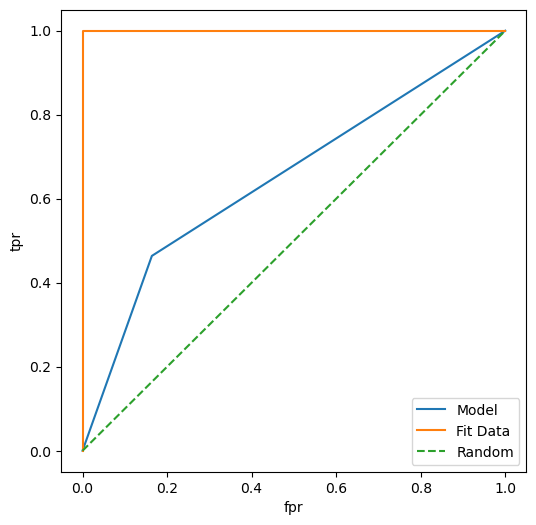

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, t = roc_curve(y_val, y_preds)
ffpr, ttpr, tt = roc_curve(y_train, train_preds)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Model')
plt.plot(ffpr, ttpr, label='Fit Data')
plt.plot([0, 1], [0, 1], label='Random', linestyle='dashed')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()

As a measure for overfitting, we can set specific parameters such as *max_depth*

In [14]:
dt = DecisionTreeClassifier(random_state=1, max_depth=2) # max_depth(level) of the tree is set to 3
dt.fit(X_train, y_train)
y_preds = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_preds)

0.6685264343319367

In [15]:
train_preds = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, train_preds)

0.7054989859726213

Now it's gotten better.

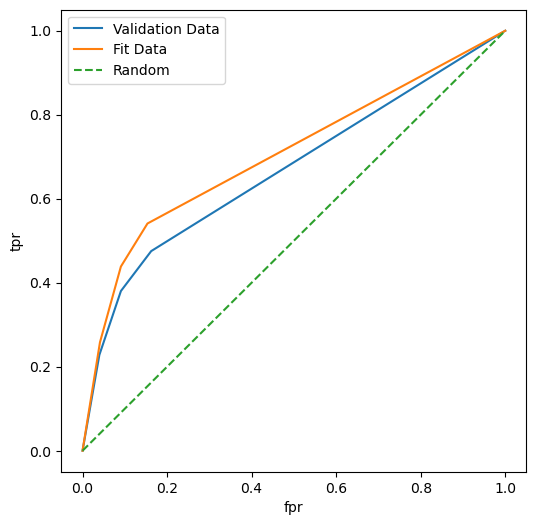

In [16]:
fpr, tpr, t = roc_curve(y_val, y_preds)
ffpr, ttpr, tt = roc_curve(y_train, train_preds)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Validation Data')
plt.plot(ffpr, ttpr, label='Fit Data')
plt.plot([0, 1], [0, 1], label='Random', linestyle='dashed')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()

In [17]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



# Lecture 6.4: Decision Tree Learning Algorithm

For each column(feature), the tree finds the optimal threshold(split) in which the result of the prediction is most accurate.

In [18]:
sample_data = [
    [2000, 'default'],
    [3000, 'ok'],
    [1000, 'default'],
    [4000, 'ok'],
    [5000, 'default'],
    [0, 'default'],
    [9000, 'ok'],
    [7000, 'ok'],
]
df_sample = pd.DataFrame(sample_data, columns=['assets', 'status'])
df_sample.sort_values(by='assets').reset_index(drop=True)

,assets,status
0,0,default
1,1000,default
2,2000,default
3,3000,ok
4,4000,ok
5,5000,default
6,7000,ok
7,9000,ok


Take this dataframe for example. The tree can basically be split into two parts with some threshold for *assets* and the result would be *default* or *ok*.

In [19]:
from IPython.display import display
# thresholds
Ts = df_sample.sort_values(by='assets').assets.values

for T in Ts:
    df_left = df_sample[df_sample.assets <= T]
    df_right = df_sample[df_sample.assets > T]
    print(f"Threshold: {T}")
    display(df_left)
    print(f"Rates: {df_left.status.value_counts(normalize=True)}")
    display(df_right)
    print(f"Rates: {df_right.status.value_counts(normalize=True)}")
    print() # newline

Threshold: 0


,assets,status
5,0,default


Rates: status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,2000,default
1,3000,ok
2,1000,default
3,4000,ok
4,5000,default
6,9000,ok
7,7000,ok


Rates: status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

Threshold: 1000


,assets,status
2,1000,default
5,0,default


Rates: status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,2000,default
1,3000,ok
3,4000,ok
4,5000,default
6,9000,ok
7,7000,ok


Rates: status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

Threshold: 2000


,assets,status
0,2000,default
2,1000,default
5,0,default


Rates: status
default    1.0
Name: proportion, dtype: float64


,assets,status
1,3000,ok
3,4000,ok
4,5000,default
6,9000,ok
7,7000,ok


Rates: status
ok         0.8
default    0.2
Name: proportion, dtype: float64

Threshold: 3000


,assets,status
0,2000,default
1,3000,ok
2,1000,default
5,0,default


Rates: status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
3,4000,ok
4,5000,default
6,9000,ok
7,7000,ok


Rates: status
ok         0.75
default    0.25
Name: proportion, dtype: float64

Threshold: 4000


,assets,status
0,2000,default
1,3000,ok
2,1000,default
3,4000,ok
5,0,default


Rates: status
default    0.6
ok         0.4
Name: proportion, dtype: float64


,assets,status
4,5000,default
6,9000,ok
7,7000,ok


Rates: status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

Threshold: 5000


,assets,status
0,2000,default
1,3000,ok
2,1000,default
3,4000,ok
4,5000,default
5,0,default


Rates: status
default    0.666667
ok         0.333333
Name: proportion, dtype: float64


,assets,status
6,9000,ok
7,7000,ok


Rates: status
ok    1.0
Name: proportion, dtype: float64

Threshold: 7000


,assets,status
0,2000,default
1,3000,ok
2,1000,default
3,4000,ok
4,5000,default
5,0,default
7,7000,ok


Rates: status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


Rates: status
ok    1.0
Name: proportion, dtype: float64

Threshold: 9000


,assets,status
0,2000,default
1,3000,ok
2,1000,default
3,4000,ok
4,5000,default
5,0,default
6,9000,ok
7,7000,ok


Rates: status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status


Rates: Series([], Name: proportion, dtype: float64)



For measuring how good the split is, the tree can use various metrics such as misclassification rate - the fraction of errors it made.

In [20]:
df_left = df_sample[df_sample.assets <= 2000]
df_right = df_sample[df_sample.assets > 2000]
print(f"Threshold: {2000}")
display(df_left)
print(f"Left Rates: {df_left.status.value_counts(normalize=True)}")
display(df_right)
print(f"Right Rates: {df_right.status.value_counts(normalize=True)}")
print() # newline

Threshold: 2000


,assets,status
0,2000,default
2,1000,default
5,0,default


Left Rates: status
default    1.0
Name: proportion, dtype: float64


,assets,status
1,3000,ok
3,4000,ok
4,5000,default
6,9000,ok
7,7000,ok


Right Rates: status
ok         0.8
default    0.2
Name: proportion, dtype: float64



Simply get the lowest misclassification average because that would be the optimal threshold.

Finding the best split:
```
For each feature
    Find possible threshold
    For each threshold
        Split dataset to two. T/F(1/0)
        Get misclassification rate for both decisions
        Get average misclassification rate(impurity)
    Return threshold(the condition) with the lowest misclassification rate
```

About finding the best depth, we must set some rules so that the tree doesn't become very deep(risk overfitting).
1. Make sure that splitting(finding a condition) shouldn't be done if the impurity rate is already 0%(it doesn't make sense).
2. Tree reached depth limit
3. Group is too small to split

NOTE: In practice, the way to measure the splits is by using either **Gini** or **Entropy**.

# Lecture 6.5: Decision Tree Parameter Tuning

- In this section, the goal is to find the optimal *max_depth* and *min_samples_split* for the Decision Tree Classifier model.

<Axes: xlabel='min_samples_leaf', ylabel='max_depth'>

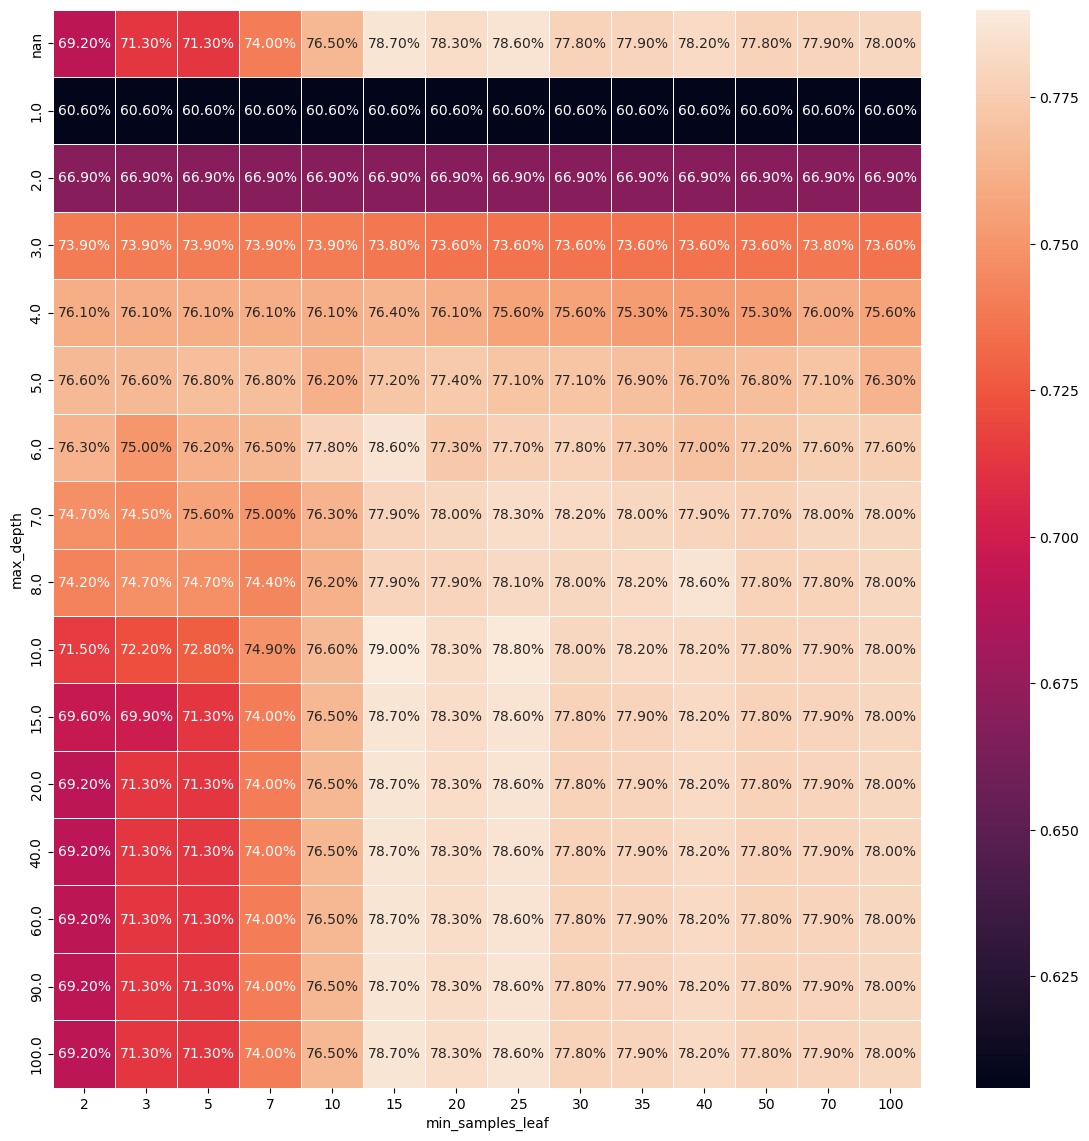

In [21]:
import seaborn as sns

df_tune_score = []
# loop through values of depth
for d in [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 40, 60, 90, 100, None]:
    # loop through values of min_samples_split
    for sp in [2, 3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 50, 70, 100]:
        dtc_model = DecisionTreeClassifier(random_state=1, max_depth=d, min_samples_leaf=sp)
        dtc_model.fit(X_train, y_train)
        dtc_predicts = dtc_model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, dtc_predicts)
        df_tune_score.append([d, sp, auc_score]) # append results as list

# convert tune scores to a dataframe
df_tune_results = pd.DataFrame(df_tune_score, columns=['max_depth', 'min_samples_leaf', 'auc']).round(3)
# 14x14 heatmap formatted to 2 decimals
fig, ax = plt.subplots(figsize=(14,14)) 
sns.heatmap(df_tune_results.pivot(index='max_depth', columns='min_samples_leaf', values='auc'), annot=True, fmt='.2%', ax=ax, linewidths=.5)

I'll be using *max_depth* = 6/10/15 and *min_samples_split* = 15/20/25

Depending on the curve

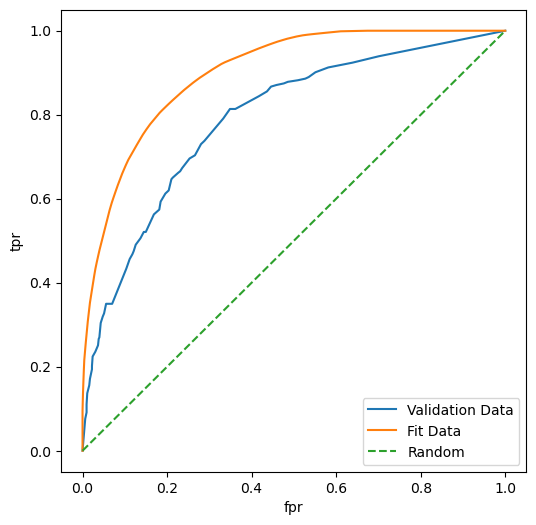

In [22]:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_leaf=15)
dt_model.fit(X_train, y_train)
y_preds = dt_model.predict_proba(X_val)[:,1]
train_preds = dt_model.predict_proba(X_train)[:,1]

# get confusion table and plot roc curve
fpr, tpr, t = roc_curve(y_val, y_preds)
ffpr, ttpr, tt = roc_curve(y_train, train_preds)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='Validation Data')
plt.plot(ffpr, ttpr, label='Fit Data')
plt.plot([0, 1], [0, 1], label='Random', linestyle='dashed')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()

# Lecture 6.6: Ensemble learning and random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
rf_preds = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, rf_preds)

0.7744726453706618

In [24]:
rf_scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, rf_preds)
    rf_scores.append([n, auc])

rf_results = pd.DataFrame(rf_scores, columns=['estimators', 'auc'])

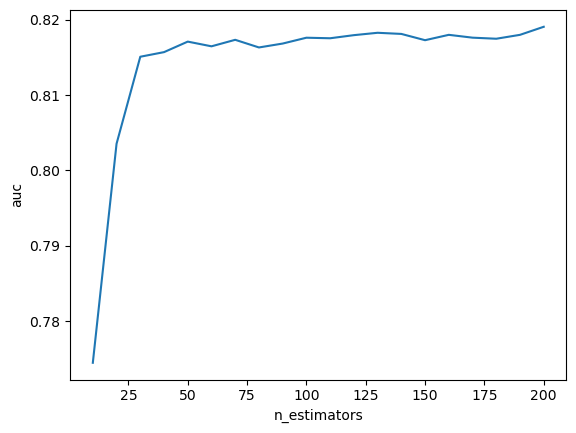

In [25]:
plt.plot(rf_results.estimators, rf_results.auc)
plt.xlabel('n_estimators')
plt.ylabel('auc')
plt.show()

In [26]:
n_estimators = 100

In [27]:
rf_depth_scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
        rf_preds = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, rf_preds)
        rf_depth_scores.append([d, n, auc])

rf_results = pd.DataFrame(rf_depth_scores, columns=['max_depth', 'estimators', 'auc'])

<Axes: xlabel='estimators', ylabel='max_depth'>

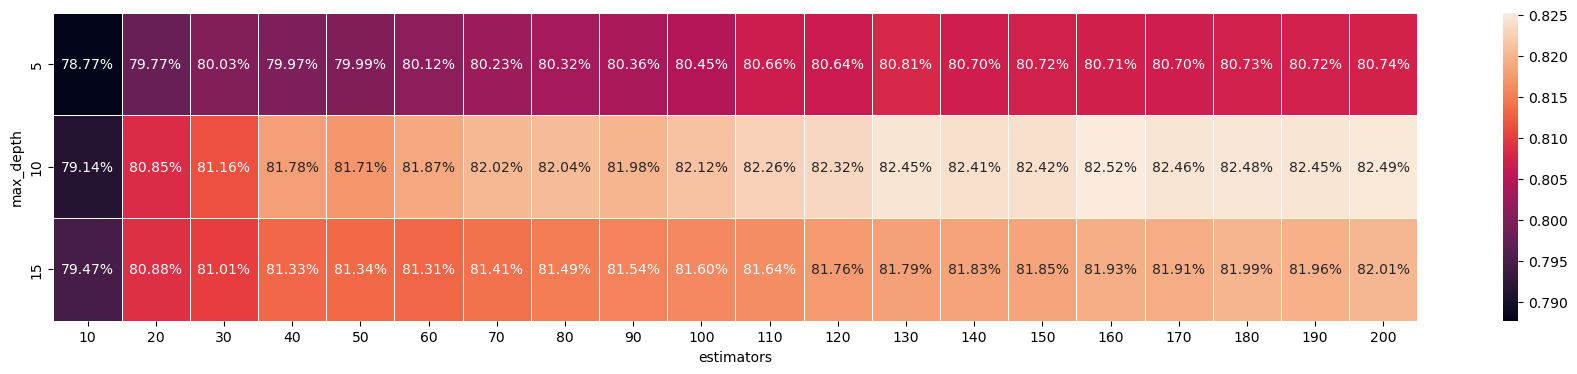

In [28]:
fig, ax = plt.subplots(figsize=(22,4)) 
sns.heatmap(rf_results.pivot(index='max_depth', columns='estimators', values='auc'), annot=True, fmt='.2%', ax=ax, linewidths=.5)

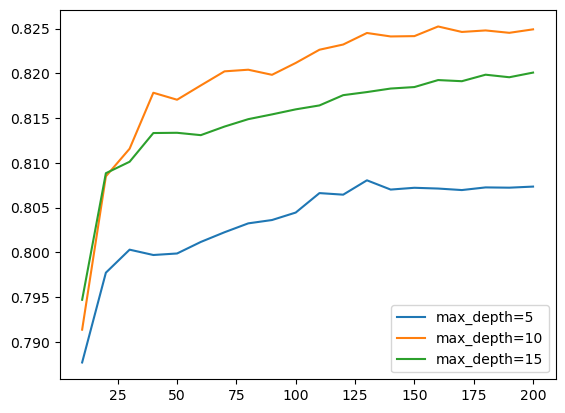

In [29]:
for d in [5, 10, 15]:
    df_subset = rf_results[rf_results.max_depth == d]
    plt.plot(df_subset.estimators, df_subset.auc,
            label='max_depth=%d' % d)

plt.legend()

In [30]:
max_depth = 10 # depth of 10 seems to be the best parameter for max_depth

In [31]:
rf_samples_scores = []
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        rf_preds = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, rf_preds)
        rf_samples_scores.append([s, n, auc])

rf_results = pd.DataFrame(rf_samples_scores, columns=['min_samples_leaf', 'estimators', 'auc'])

<Axes: xlabel='estimators', ylabel='min_samples_leaf'>

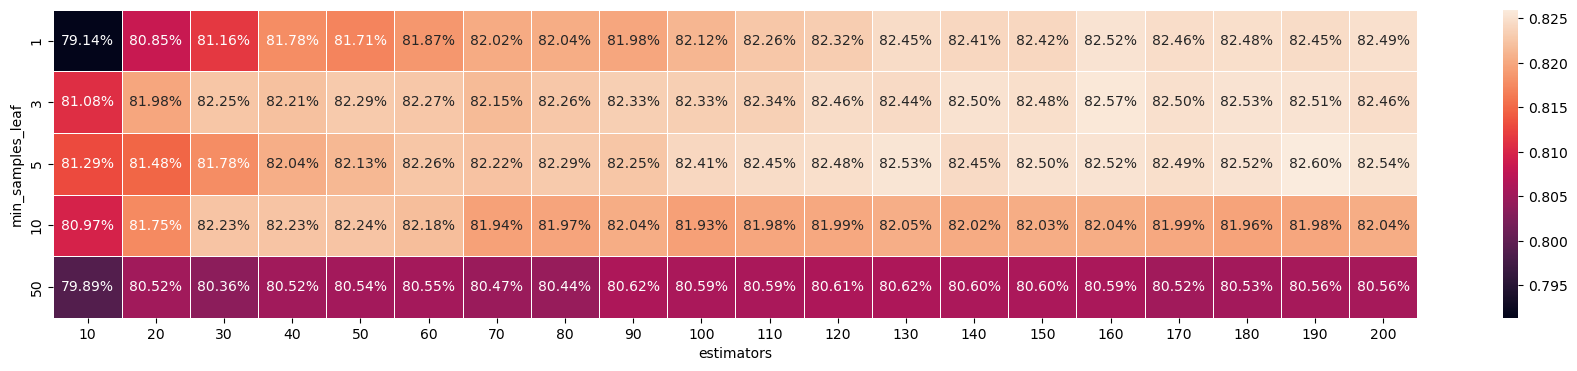

In [32]:
fig, ax = plt.subplots(figsize=(22,4)) 
sns.heatmap(rf_results.pivot(index='min_samples_leaf', columns='estimators', values='auc'), annot=True, fmt='.2%', ax=ax, linewidths=.5)

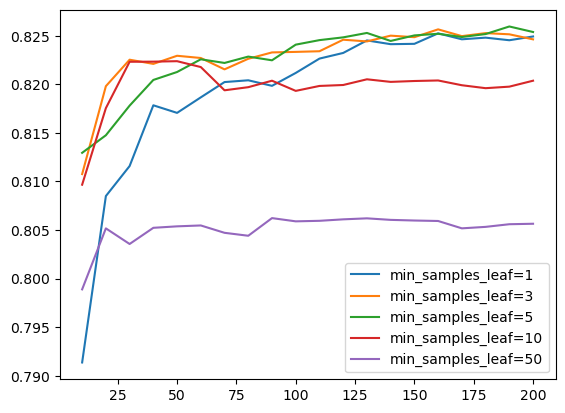

In [33]:
for s in [1, 3, 5, 10, 50]:
    df_subset = rf_results[rf_results.min_samples_leaf == s]
    plt.plot(df_subset.estimators, df_subset.auc,
            label='min_samples_leaf=%d' % s)

plt.legend()

In [34]:
min_samples_leaf = 3 

In [35]:
rf = RandomForestClassifier(random_state=1,
                            max_depth=10,
                            min_samples_leaf=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

# Lecture 6.7: Gradient Boosting with XGBoost

In [36]:
import xgboost as xgb

In [65]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features) # dmatrix for train
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features) # dmatrix for validation

In [136]:
%%capture output
# train xgboost
xgb_params = {
    'eval_metric': 'auc',
    'eta': 0.434053563235,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic', # task is classification
    #'nthreads': 6, # parallelize on 6 cores
    'seed': 1,
    'verbosity': 1, # show only warnings
    #'early_stopping_rounds': 10
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=[(dtrain, 'train'), (dval, 'validation')],
                  verbose_eval=5,
                  num_boost_round=200)

In [137]:
def parse_xgboost_output(output):
    s = output.stdout
    parsed_results = []
    # for each line excluding the last element which is ['']
    for line in s.split('\n')[:-1]: 
        n_iter, train_auc, val_auc = line.split('\t')
        n_iterations = n_iter.strip('[]')
        val, vscore = val_auc.split(':')
        train, tscore = train_auc.split(':')
        parsed_results.append((int(n_iterations), float(tscore), float(vscore)))
    
    df_xgb_results = pd.DataFrame(parsed_results, columns=['n_iteration', 'train_auc', 'val_auc'])
    return df_xgb_results

df_score = parse_xgboost_output(output)
df_score.head()

,n_iteration,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.94124,0.81113
2,10,0.96379,0.81291
3,15,0.97888,0.81497
4,20,0.98752,0.81146


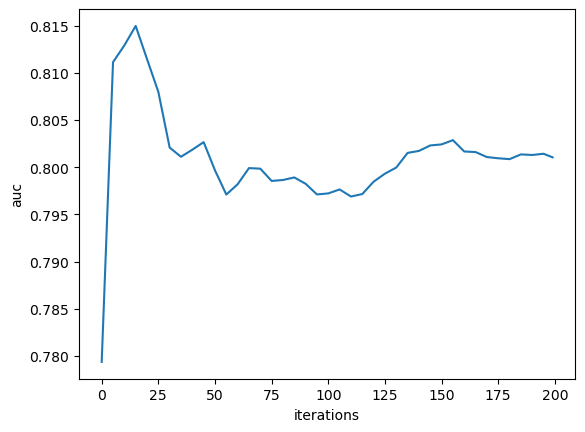

In [138]:
plt.plot(df_score.n_iteration, df_score.val_auc, label='val')
plt.xlabel('iterations')
plt.ylabel('auc');

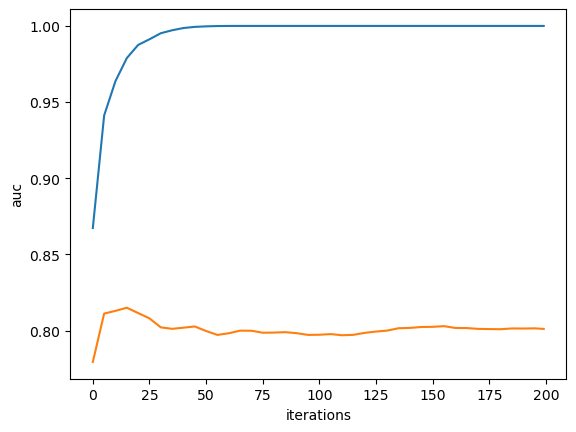

In [139]:
plt.plot(df_score.n_iteration, df_score.train_auc, label='train')
plt.plot(df_score.n_iteration, df_score.val_auc, label='val')
plt.xlabel('iterations')
plt.ylabel('auc');

In [140]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.801049260129326

# Lecture 6.8: XGBoost Parameter Tuning

For this lecture, the goal is to tune the following parameters:
```
1. eta (learning rate)
2. max_depth
3. min_child_weight
```

In [155]:
scores = {}

In [171]:
%%capture output
# train xgboost
xgb_params = {
    'eval_metric': 'auc',
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic', # task is classification
    #'nthreads': 6, # parallelize on 6 cores
    'seed': 1,
    'verbosity': 1, # show only warnings
    #'early_stopping_rounds': 10
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=[(dtrain, 'train'), (dval, 'validation')],
                  verbose_eval=5,
                  num_boost_round=200)

In [172]:
key = 'eta=%s' % xgb_params['eta']
scores[key] = parse_xgboost_output(output)
key

'eta=0.3'

In [173]:
scores[key].head()

,n_iteration,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729


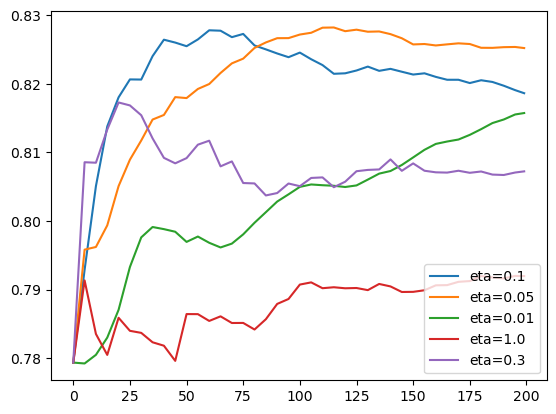

In [176]:
for key, df_score in scores.items():
    plt.plot(df_score.n_iteration, df_score.val_auc, label=key)
plt.legend()

0.1 *eta* seems to be good according to Alexey because it takes lesser iterations compared to *eta* = 0.05 that takes twice as many iterations.

In [177]:
eta=0.1

In [181]:
scores = {}

In [188]:
%%capture output
# train xgboost
xgb_params = {
    'eval_metric': 'auc',
    'eta': eta,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic', # task is classification
    #'nthreads': 6, # parallelize on 6 cores
    'seed': 1,
    'verbosity': 1, # show only warnings
    #'early_stopping_rounds': 10
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=[(dtrain, 'train'), (dval, 'validation')],
                  verbose_eval=5,
                  num_boost_round=200)

In [191]:
key = 'max_depth=%s' % xgb_params['max_depth']
scores[key] = parse_xgboost_output(output)

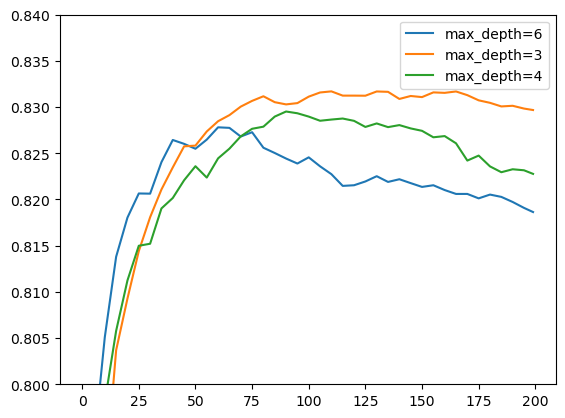

In [195]:
for key, df_score in scores.items():
    plt.plot(df_score.n_iteration, df_score.val_auc, label=key)
plt.ylim(0.8, 0.84)
plt.legend()

In [196]:
max_depth = 3 # clearly the better parameter for max_depth is when its set to 3

In [201]:
scores = {}

In [209]:
%%capture output
# train xgboost
xgb_params = {
    'eval_metric': 'auc',
    'eta': eta,
    'max_depth': max_depth,
    'min_child_weight': 35,
    'objective': 'binary:logistic', # task is classification
    #'nthreads': 6, # parallelize on 6 cores
    'seed': 1,
    'verbosity': 1, # show only warnings
    #'early_stopping_rounds': 10
}
model = xgb.train(xgb_params, 
                  dtrain, 
                  evals=[(dtrain, 'train'), (dval, 'validation')],
                  verbose_eval=5,
                  num_boost_round=200)

In [210]:
key = 'min_child_weight=%s' % xgb_params['min_child_weight']
scores[key] = parse_xgboost_output(output)
key

'min_child_weight=35'

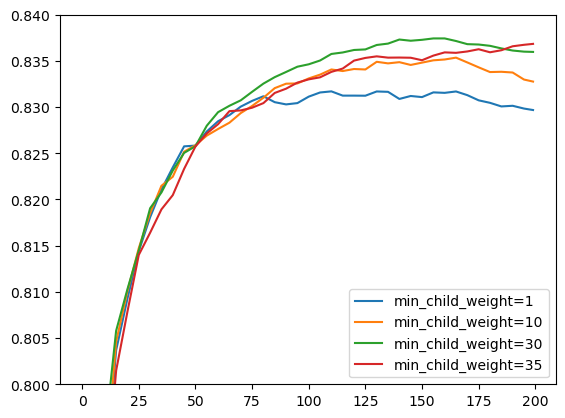

In [212]:
for key, df_score in scores.items():
    plt.plot(df_score.n_iteration, df_score.val_auc, label=key)
plt.ylim(0.8, 0.84)
plt.legend()

In [216]:
# train xgboost
xgb_params = {
    'eval_metric': 'auc',
    'eta': eta,
    'max_depth': max_depth,
    'min_child_weight': 1,
    'objective': 'binary:logistic', # task is classification
    #'nthreads': 6, # parallelize on 6 cores
    'seed': 1,
    'verbosity': 1, # show only warnings
    #'early_stopping_rounds': 10
}
model = xgb.train(xgb_params, 
                  dtrain,
                  num_boost_round=175)

# Lecture 6.9: Selecting the model

In [217]:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=6, min_samples_leaf=15)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, random_state=1)

In [220]:
rf = RandomForestClassifier(n_estimators=200,
                            random_state=1,
                            max_depth=10,
                            min_samples_leaf=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [221]:
# train xgboost
xgb_params = {
    'eval_metric': 'auc',
    'eta': eta,
    'max_depth': max_depth,
    'min_child_weight': 1,
    'objective': 'binary:logistic', # task is classification
    #'nthreads': 6, # parallelize on 6 cores
    'seed': 1,
    'verbosity': 1, # show only warnings
    #'early_stopping_rounds': 10
}

model = xgb.train(xgb_params, 
                  dtrain,
                  num_boost_round=175)

In [222]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6685264343319367

In [223]:
y_pred = dt_model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7856948245380349

In [224]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [226]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8309347073212081

XGBoost is the best model in this case.

In [231]:
df_full_train.reset_index(drop=True, inplace=True)
y_full = (df_full_train.status == 'default').astype(int).values

In [232]:
del df_full_train['status']

In [245]:
full_dicts = df_full_train.to_dict(orient='records')
X = dv.transform(full_dicts)
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [247]:
dtrain_full = xgb.DMatrix(X, 
                          label=y_full,
                         feature_names=features)
dtest = xgb.DMatrix(X_test, 
                    label=y_test,
                    feature_names=features)

In [248]:
model = xgb.train(xgb_params, 
                  dtrain_full,
                  num_boost_round=175)

In [249]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8335491911441278